In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

In [52]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [53]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [54]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [55]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    df_account_value_=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/1/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value_ = df_account_value_.append(temp,ignore_index=True)

    df_account_value = pd.DataFrame({'account_value':df_account_value_['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[126:].reset_index(drop=True))
    return df_account_value

## DJIA

In [56]:
dji = pd.read_csv("new-total50.csv")
test_dji=dji[(dji['Date']>="2018-01-01") & (dji['Date']<="2022-01-01")]
test_dji = test_dji.reset_index(drop=True)

In [57]:
# %matplotlib inline
# test = test_dji.set_index('Date')
# test['close'].plot(grid = True, figsize=(15,7))

In [58]:
test_dji.shape

(973, 11)

In [59]:
test_dji['daily_return'] = test_dji['close'].pct_change(1)
test_dji = test_dji[0:882]
test_dji

,trade_date,open,high,low,close,pre_close,change,pct_chg,volume,amount,Date,daily_return
0,20180102,2867.5282,2912.2694,2867.5282,2908.7318,2860.4363,48.2955,1.6884,54008668,6.341151e+07,2018-01-02,NaN
1,20180103,2914.2787,2947.6307,2906.5984,2913.2596,2908.7318,4.5278,0.1557,48206865,6.933966e+07,2018-01-03,0.001557
2,20180104,2918.2559,2934.1518,2910.6624,2919.4787,2913.2596,6.2191,0.2135,43520711,5.907171e+07,2018-01-04,0.002135
3,20180105,2926.7782,2940.1799,2920.0843,2932.3558,2919.4787,12.8771,0.4411,49943348,6.249227e+07,2018-01-05,0.004411
4,20180108,2933.8245,2952.3440,2926.8709,2947.7613,2932.3558,15.4055,0.5254,58052793,8.207057e+07,2018-01-08,0.005254
...,...,...,...,...,...,...,...,...,...,...,...,...
877,20210811,3280.8107,3298.4082,3259.5344,3262.5751,3288.6513,-26.0762,-0.7929,40066318,1.004064e+08,2021-08-11,-0.007929
878,20210812,3247.8004,3262.8951,3222.6887,3226.1135,3262.5751,-36.4616,-1.1176,32263283,9.817468e+07,2021-08-12,-0.011176
879,20210813,3212.3327,3242.3123,3199.8551,3217.8366,3226.1135,-8.2769,-0.2566,28209573,8.731437e+07,2021-08-13,-0.002566
880,20210816,3212.6626,3246.9323,3205.5333,3222.6222,3217.8366,4.7856,0.1487,32549562,8.798732e+07,2021-08-16,0.001487


In [60]:
dow_strat = backtest_strat(test_dji)

## Ensemble Strategy

In [61]:
df = pd.read_csv('data-2.csv')

In [62]:
rebalance_window = 126
validation_window = 126
unique_trade_date = df[(df.Date > "2017-07-01")&(df.Date <= "2022-01-01")].datadate.unique()

In [63]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [64]:
ensemble_account_value = get_account_value('ensemble')

1.082602200325434


In [65]:
ensemble_account_value

,account_value,datadate
0,1.000000e+06,20180103
1,1.001649e+06,20180104
2,1.001855e+06,20180105
3,1.005081e+06,20180108
4,1.015093e+06,20180109
...,...,...
877,2.058219e+06,20210812
878,2.059533e+06,20210813
879,2.059756e+06,20210816
880,2.058808e+06,20210817


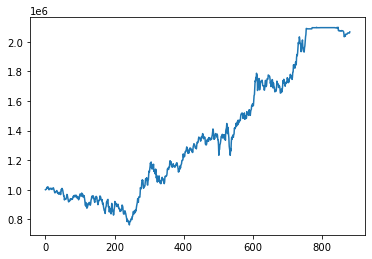

In [66]:
# ensemble_account_value = ensemble_account_value.set_index('Date')
ensemble_account_value.account_value.plot()

In [67]:
ensemble_account_value = get_daily_return(ensemble_account_value)
ensemble_account_value['Date'] = test_dji['Date']
ensemble_account_value

Sharpe:  1.082602200325434


,account_value,datadate,daily_return,Date
0,1.000000e+06,20180103,NaN,2018-01-02
1,1.001649e+06,20180104,0.001649,2018-01-03
2,1.001855e+06,20180105,0.000205,2018-01-04
3,1.005081e+06,20180108,0.003221,2018-01-05
4,1.015093e+06,20180109,0.009961,2018-01-08
...,...,...,...,...
877,2.058219e+06,20210812,-0.000353,2021-08-11
878,2.059533e+06,20210813,0.000639,2021-08-12
879,2.059756e+06,20210816,0.000108,2021-08-13
880,2.058808e+06,20210817,-0.000460,2021-08-16


In [68]:
ensemble_strat = backtest_strat(ensemble_account_value)

In [69]:
# ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2018-01-02
End date,2021-08-17
Total months,42
,Backtest
Annual return,23.045%
Cumulative returns,106.644%
Annual volatility,21.273%
Sharpe ratio,1.08
Calmar ratio,0.92
Stability,0.91
Max drawdown,-25.182%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.18,2018-01-11,2019-01-02,2019-02-28,296
1,14.87,2020-03-04,2020-03-18,2020-04-13,29
2,12.59,2019-12-30,2020-01-23,2020-03-03,47
3,12.38,2019-04-09,2019-05-22,2019-06-28,59
4,7.52,2020-07-10,2020-10-26,2020-12-14,112


C:\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020-master\venv\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


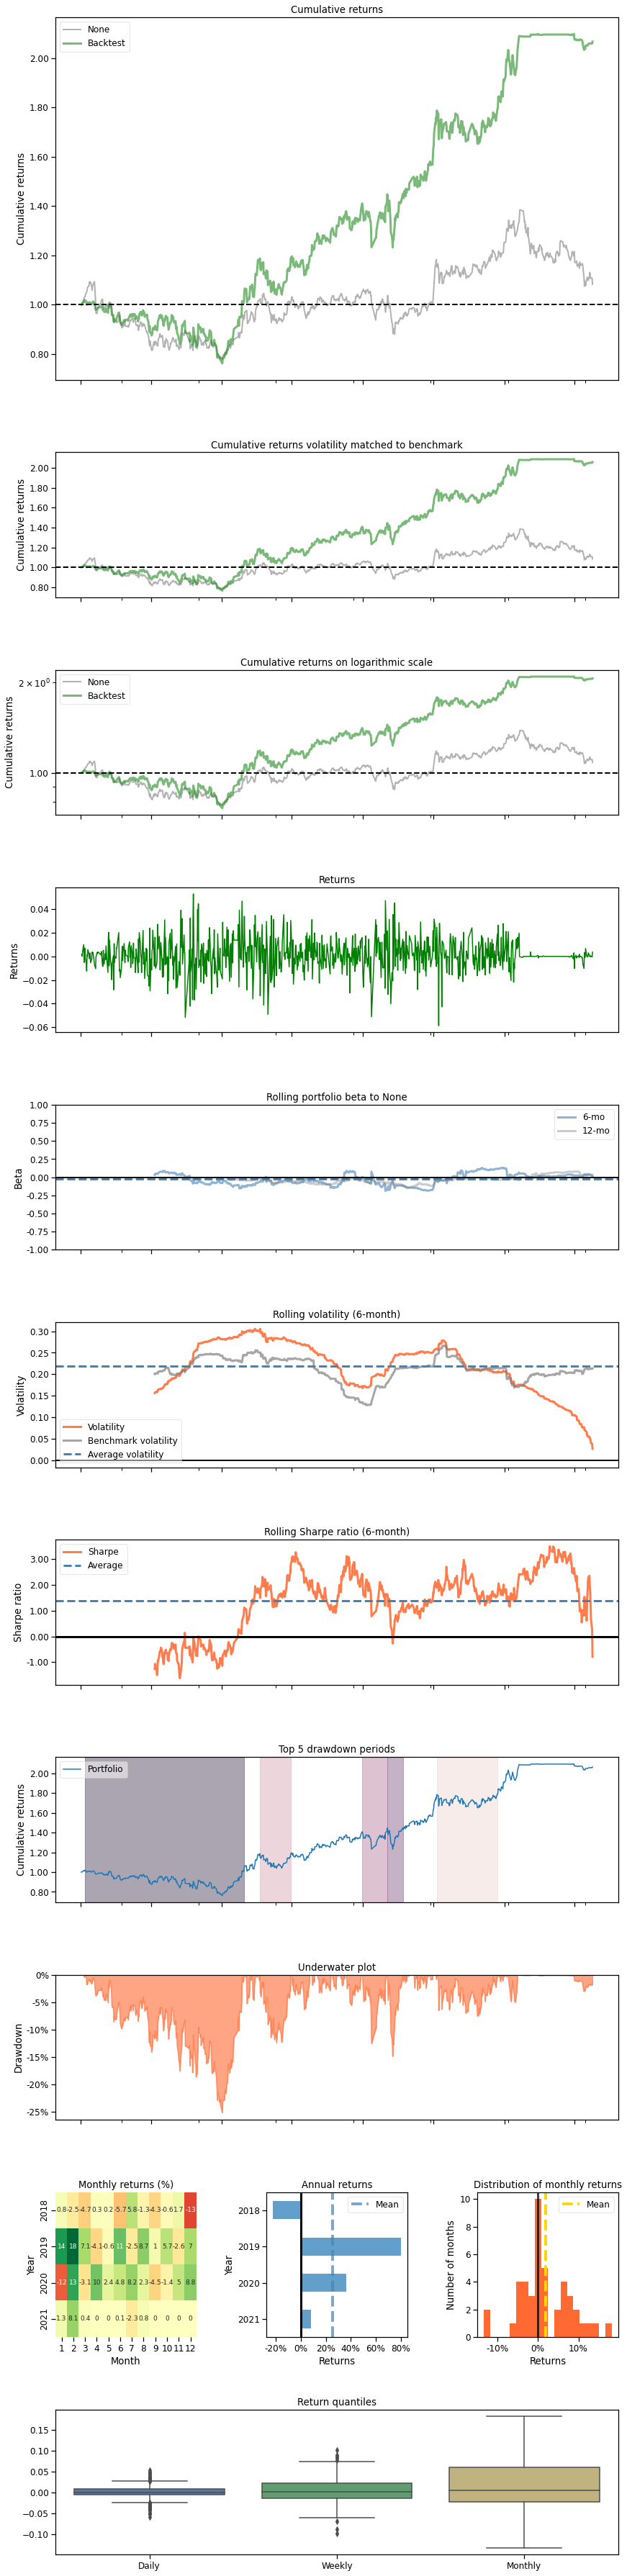

In [70]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
 pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [71]:
a2c_account_value = get_account_value('a2c')
a2c_account_value = get_daily_return(a2c_account_value)
a2c_account_value['Date'] = test_dji['Date']
a2c_strat = backtest_strat(a2c_account_value)
a2c_account_value

0.7333359830967445
Sharpe:  0.7333359830967445


,account_value,datadate,daily_return,Date
0,1.000000e+06,20180103,NaN,2018-01-02
1,1.000019e+06,20180104,0.000019,2018-01-03
2,1.000057e+06,20180105,0.000038,2018-01-04
3,1.001748e+06,20180108,0.001691,2018-01-05
4,1.006835e+06,20180109,0.005078,2018-01-08
...,...,...,...,...
877,1.619165e+06,20210812,-0.000382,2021-08-11
878,1.620346e+06,20210813,0.000730,2021-08-12
879,1.620660e+06,20210816,0.000194,2021-08-13
880,1.620341e+06,20210817,-0.000197,2021-08-16


Start date,2018-01-02
End date,2021-08-17
Total months,42
,Backtest
Annual return,14.911%
Cumulative returns,62.653%
Annual volatility,22.375%
Sharpe ratio,0.73
Calmar ratio,0.69
Stability,0.87
Max drawdown,-21.609%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.61,2018-06-06,2019-01-02,2019-02-22,188
1,15.07,2019-11-18,2020-01-23,2020-07-02,164
2,12.04,2019-04-18,2019-05-22,2019-06-28,52
3,11.24,2021-01-11,2021-02-03,NaT,NaN
4,9.23,2020-07-08,2020-07-15,2020-08-14,28


C:\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020-master\venv\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


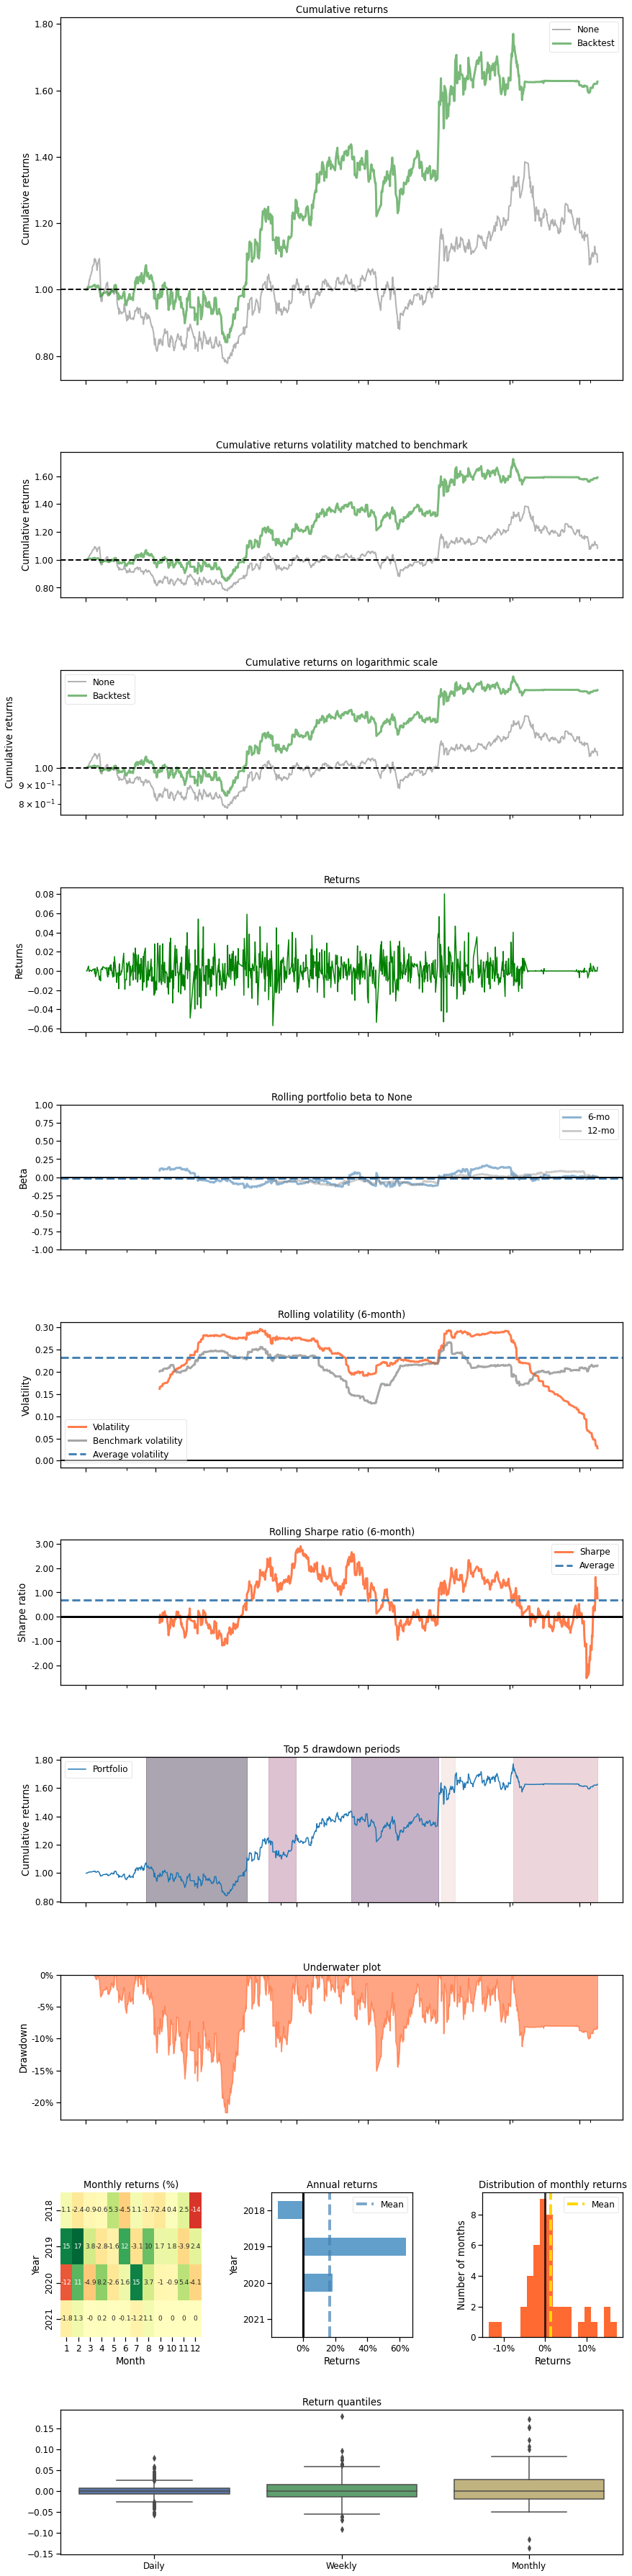

In [72]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
 pyfolio.create_full_tear_sheet(returns = a2c_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [73]:
ppo_account_value = get_account_value('ppo')
ppo_account_value = get_daily_return(ppo_account_value)
ppo_account_value['Date'] = test_dji['Date']
ppo_strat = backtest_strat(ppo_account_value)
ppo_account_value

0.46086027160789056
Sharpe:  0.46086027160789056


,account_value,datadate,daily_return,Date
0,1.000000e+06,20180103,NaN,2018-01-02
1,9.999843e+05,20180104,-0.000016,2018-01-03
2,9.999934e+05,20180105,0.000009,2018-01-04
3,1.000040e+06,20180108,0.000047,2018-01-05
4,1.000102e+06,20180109,0.000061,2018-01-08
...,...,...,...,...
877,1.360272e+06,20210812,-0.032502,2021-08-11
878,1.368363e+06,20210813,0.005948,2021-08-12
879,1.366425e+06,20210816,-0.001416,2021-08-13
880,1.323479e+06,20210817,-0.031430,2021-08-16


In [74]:
ddpg_account_value = get_account_value('ddpg')
ddpg_account_value = get_daily_return(ddpg_account_value)
ddpg_account_value['Date'] = test_dji['Date']
ddpg_strat = backtest_strat(ddpg_account_value)
ddpg_account_value

0.5362071678959205
Sharpe:  0.5362071678959205


,account_value,datadate,daily_return,Date
0,1.000000e+06,20180103,NaN,2018-01-02
1,1.001649e+06,20180104,0.001649,2018-01-03
2,1.001855e+06,20180105,0.000205,2018-01-04
3,1.005081e+06,20180108,0.003221,2018-01-05
4,1.015093e+06,20180109,0.009961,2018-01-08
...,...,...,...,...
877,1.409449e+06,20210812,-0.033489,2021-08-11
878,1.417700e+06,20210813,0.005854,2021-08-12
879,1.417554e+06,20210816,-0.000103,2021-08-13
880,1.366429e+06,20210817,-0.036066,2021-08-16


Start date,2018-01-02
End date,2021-08-17
Total months,42
,Backtest
Annual return,8.182%
Cumulative returns,31.687%
Annual volatility,22.656%
Sharpe ratio,0.46
Calmar ratio,0.37
Stability,0.76
Max drawdown,-22.409%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.41,2018-02-02,2019-01-02,2019-02-22,276
1,20.95,2021-06-30,2021-08-17,NaT,NaN
2,19.23,2019-11-04,2020-03-18,2020-06-30,172
3,14.57,2019-04-18,2019-05-22,2019-10-30,140
4,11.49,2020-07-08,2020-07-23,2020-08-14,28


C:\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020-master\venv\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


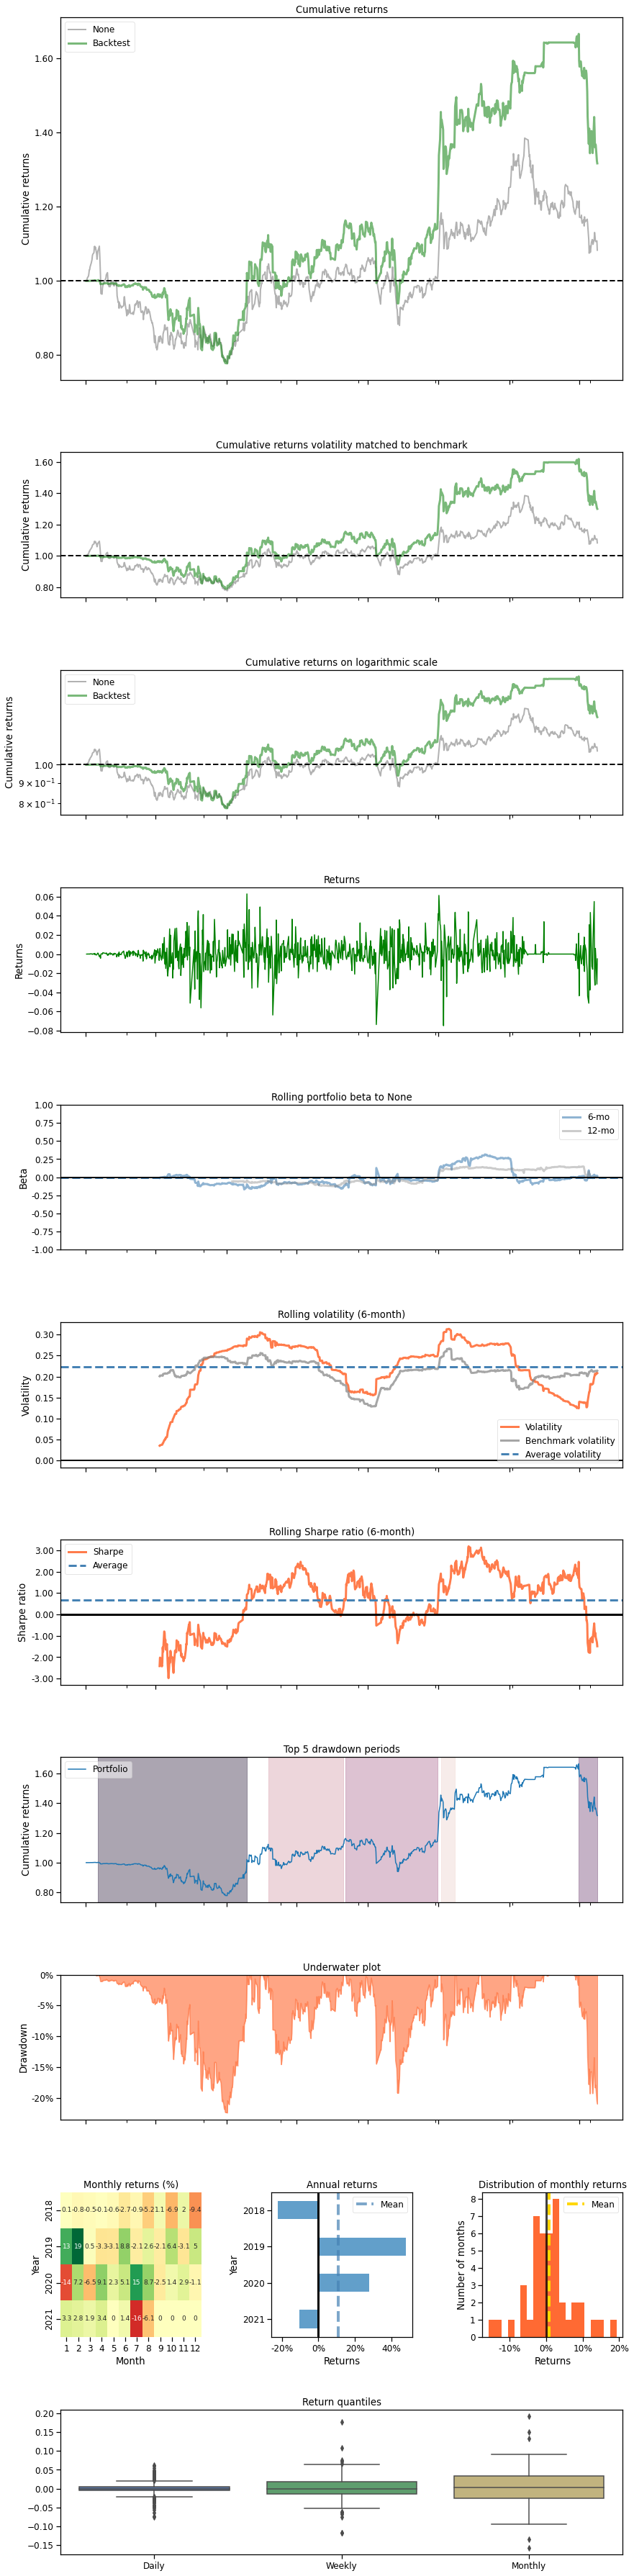

In [75]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
 pyfolio.create_full_tear_sheet(returns = ppo_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2018-01-02
End date,2021-08-17
Total months,42
,Backtest
Annual return,9.09%
Cumulative returns,35.597%
Annual volatility,19.949%
Sharpe ratio,0.54
Calmar ratio,0.36
Stability,0.85
Max drawdown,-25.182%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.18,2018-01-11,2019-01-02,2019-03-01,297
1,22.31,2021-06-30,2021-08-17,NaT,NaN
2,9.14,2020-02-11,2020-03-18,2020-05-07,63
3,8.72,2020-12-01,2020-12-21,2021-01-11,30
4,8.40,2019-04-09,2019-05-22,2019-08-21,97


C:\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020-master\venv\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


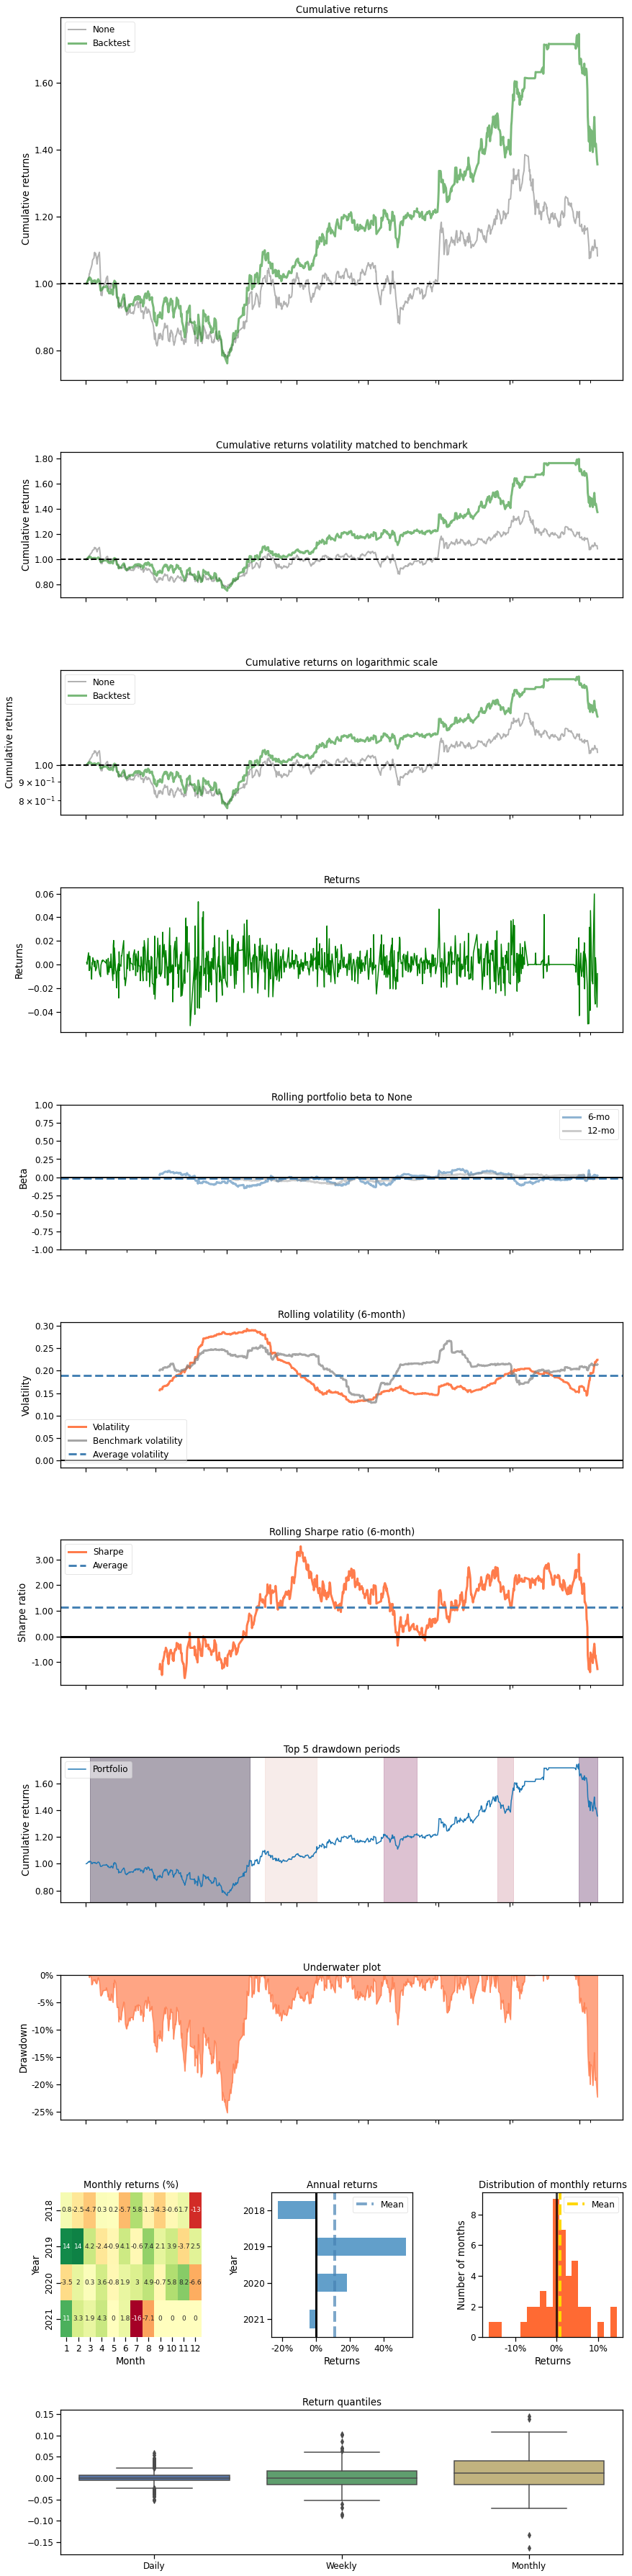

In [76]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
 pyfolio.create_full_tear_sheet(returns = ddpg_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [77]:
daily_return_all = pd.DataFrame({'Date':ensemble_account_value['Date'],'ppo_strategy':ppo_account_value['daily_return'],'a2c_strategy':a2c_account_value['daily_return'],'ddpg_strategy':ddpg_account_value['daily_return'],'ensemble_strategy':ensemble_account_value['daily_return'],'SSE 50 Index':test_dji['daily_return']})
# daily_return_all.to_csv("daily_returns.csv")

In [78]:
from pathlib import Path
daily_returns = pd.read_csv(
    Path("daily_returns.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)
daily_returns

,ppo_strategy,a2c_strategy,ddpg_strategy,ensemble_strategy,SSE 50 Index
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000016,0.000019,0.001649,0.001649,0.001557
2018-01-04,0.000009,0.000038,0.000205,0.000205,0.002135
2018-01-05,0.000047,0.001691,0.003221,0.003221,0.004411
2018-01-08,0.000061,0.005078,0.009961,0.009961,0.005254
...,...,...,...,...,...
2021-08-11,-0.032502,-0.000382,-0.033489,-0.000353,-0.007929
2021-08-12,0.005948,0.000730,0.005854,0.000639,-0.011176
2021-08-13,-0.001416,0.000194,-0.000103,0.000108,-0.002566


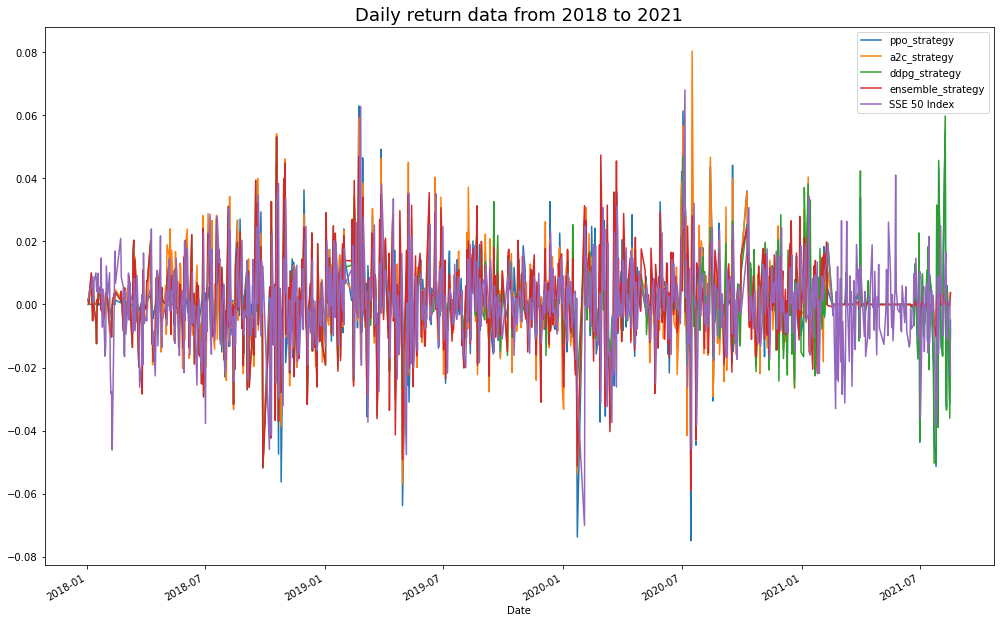

In [79]:
ax =  daily_returns.plot(figsize=(17,11),
                         title="Daily return data from 2018 to 2021",
)
ax.title.set_size(18)

In [80]:
# Calculate the cumulative returns of the SOROS FUND MANAGEMENT LLC
cumulative_returns = (1 + daily_returns).cumprod()
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns

,ppo_strategy,a2c_strategy,ddpg_strategy,ensemble_strategy,SSE 50 Index
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.999984,1.000019,1.001649,1.001649,1.001557
2018-01-04,0.999993,1.000057,1.001855,1.001855,1.003695
2018-01-05,1.000040,1.001748,1.005081,1.005081,1.008122
2018-01-08,1.000102,1.006835,1.015093,1.015093,1.013418
...,...,...,...,...,...
2021-08-11,1.360272,1.619165,1.409450,2.058219,1.121649
2021-08-12,1.368363,1.620346,1.417700,2.059534,1.109114
2021-08-13,1.366425,1.620660,1.417554,2.059756,1.106268


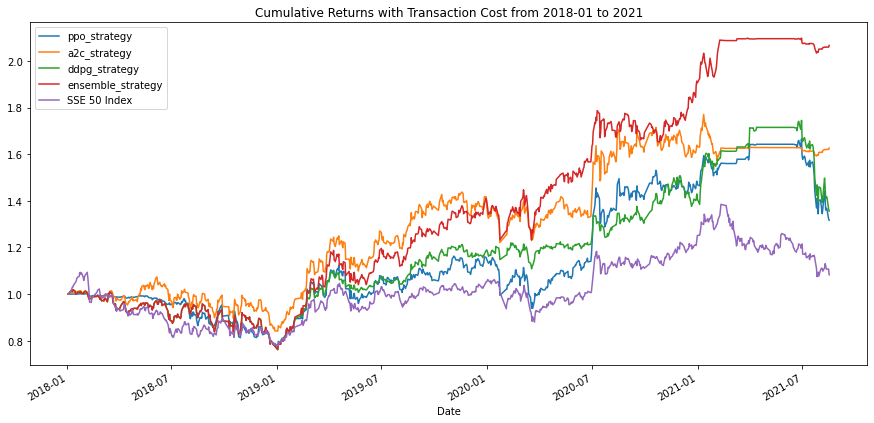

In [81]:
# Using the Pandas plot function, visualize the the cumulative return DataFrame for SOROS FUND MANAGEMENT LLC
# Be sure to adjust the figure size and add a title
cumulative_returns.plot(figsize=(15,7),
                        title="Cumulative Returns with Transaction Cost from 2018-01 to 2021",
                       )


In [82]:
cumulative_returns

,ppo_strategy,a2c_strategy,ddpg_strategy,ensemble_strategy,SSE 50 Index
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.999984,1.000019,1.001649,1.001649,1.001557
2018-01-04,0.999993,1.000057,1.001855,1.001855,1.003695
2018-01-05,1.000040,1.001748,1.005081,1.005081,1.008122
2018-01-08,1.000102,1.006835,1.015093,1.015093,1.013418
...,...,...,...,...,...
2021-08-11,1.360272,1.619165,1.409450,2.058219,1.121649
2021-08-12,1.368363,1.620346,1.417700,2.059534,1.109114
2021-08-13,1.366425,1.620660,1.417554,2.059756,1.106268


In [83]:
# import numpy as np
# def MaxDrawdown(return_list):
#
#     # 1. find all of the peak of cumlative return
#     maxcum = np.zeros(len(return_list))
#     b = return_list[0]
#     for i in range(0,len((return_list))):
#         if (return_list[i]>b):
#             b = return_list[i]
#         maxcum[i] = b
#
#     # 2. then find the max drawndown point
#     i = np.argmax((maxcum-return_list)/maxcum)
#     if i == 0:
#         return 0
#     j = np.argmax(return_list[:i])
#     max = (return_list[j]-return_list[i])/return_list[j]
#     # 3. return the maxdrawndown
#     return max

In [84]:
# print(f"ppo_strategy maxdrawdown:{MaxDrawdown(cumulative_returns['ppo_strategy'])}")
# print(f"a2c_strategy maxdrawdown:{MaxDrawdown(cumulative_returns['a2c_strategy'])}")
# print(f"ddpg_strategy maxdrawdown:{MaxDrawdown(cumulative_returns['ddpg_strategy'])}")
# print(f"ensemble_strategy maxdrawdown:{MaxDrawdown(cumulative_returns['ensemble_strategy'])}")
# print(f"50-stock maxdrawdown:{MaxDrawdown(cumulative_returns['50-stock'])}")

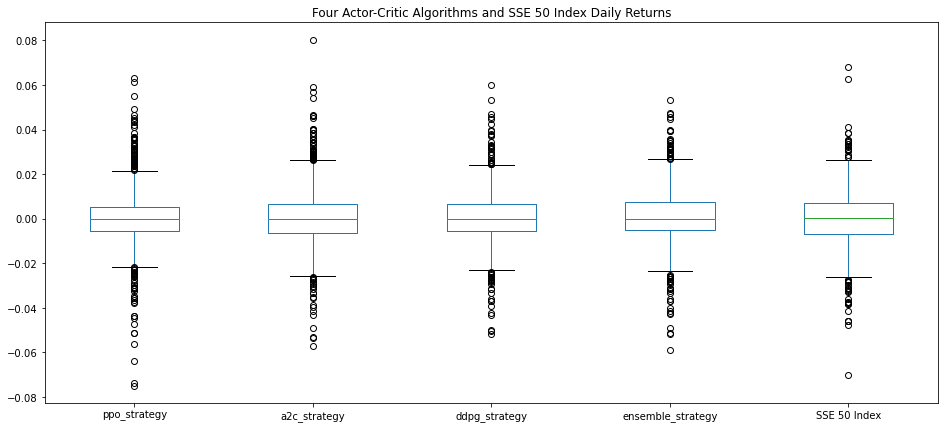

In [85]:
# Use the daily return data to create box plots to visualize the volatility of SOROS FUND MANAGEMENT LLC
# Include a title parameter and adjust the figure size
daily_returns.plot(kind="box", title="Four Actor-Critic Algorithms and SSE 50 Index Daily Returns",
                         figsize=(16,7),
                        )

In [86]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
whale_nav_std = daily_returns.std()

# Review the standard deviations sorted smallest to largest
whale_nav_std.sort_values()

ddpg_strategy        0.012567
SSE 50 Index         0.013327
ensemble_strategy    0.013401
a2c_strategy         0.014095
ppo_strategy         0.014272
dtype: float64

In [87]:
# Calculate and sort the annualized standard deviation of the 10 portfolios and the 50
# Review the annual standard deviations smallest to largest
print("Annualized standard deviation for each of the ten portfolios and for the 50.")
print("----------------------------------------------------------------------------------")
annualized_std = whale_nav_std * np.sqrt(252)
annualized_std.sort_values()

Annualized standard deviation for each of the ten portfolios and for the 50.
----------------------------------------------------------------------------------


ddpg_strategy        0.199492
SSE 50 Index         0.211553
ensemble_strategy    0.212732
a2c_strategy         0.223746
ppo_strategy         0.226559
dtype: float64

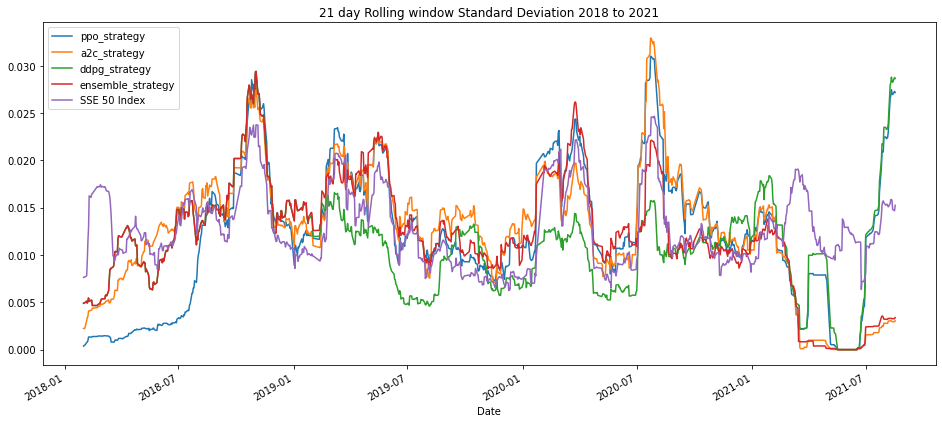

In [97]:
# Using the daily returns DataFrame and a 21-day rolling window,
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(
    title="21 day Rolling window Standard Deviation 2018 to 2021",
figsize=(16,7))

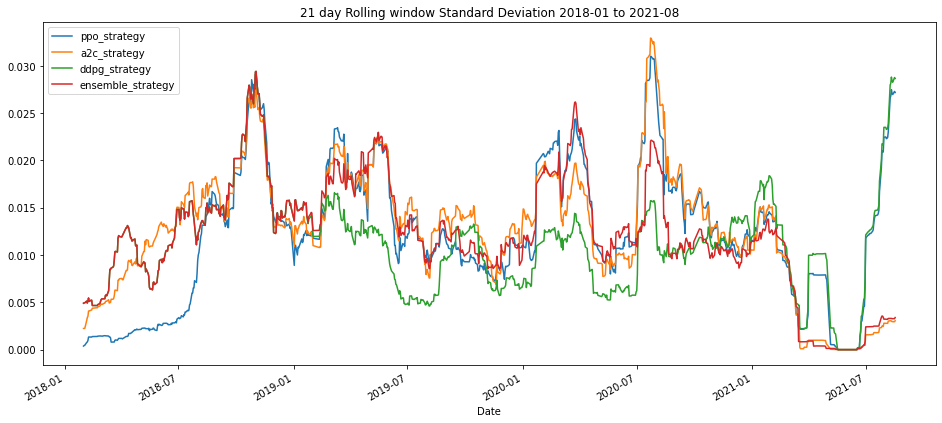

In [96]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios.
# Include a title parameter and adjust the figure size
fund_df = daily_returns.drop(columns=["SSE 50 Index"])
fund_df.rolling(window=21).std().plot(
    title="21 day Rolling window Standard Deviation 2018-01 to 2021-08",
figsize=(16,7))

In [90]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
print("Annual average return from 2018-01 to 2021-08")
print("----------------------------------------------------------------------------------")
annual_avg_return = daily_returns.mean() * 252
annual_avg_return.sort_values()

Annual average return from 2018-01 to 2021-08
----------------------------------------------------------------------------------


SSE 50 Index         0.045158
ppo_strategy         0.104412
ddpg_strategy        0.106969
a2c_strategy         0.164081
ensemble_strategy    0.230304
dtype: float64

In [91]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
print("Sharpe Ratios from 2018-01 to 2021-08")
print("----------------------------------------------------------------------------------")
sharpe_ratios = annual_avg_return / annualized_std
sharpe_ratios.sort_values()

Sharpe Ratios from 2018-01 to 2021-08
----------------------------------------------------------------------------------


SSE 50 Index         0.213461
ppo_strategy         0.460860
ddpg_strategy        0.536207
a2c_strategy         0.733336
ensemble_strategy    1.082602
dtype: float64

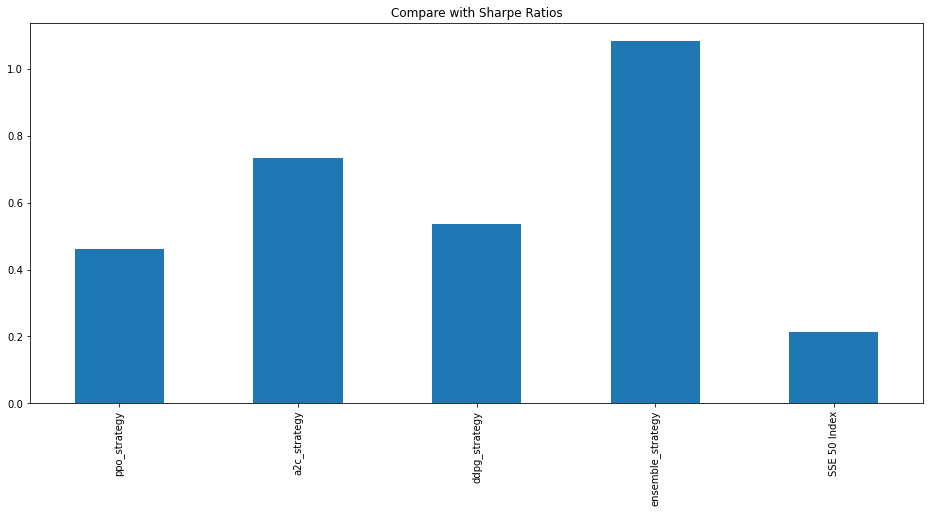

In [92]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(kind= "bar",
                  title="Compare with Sharpe Ratios",
                  figsize=(16,7),)

In [93]:
df['turbulence']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
24305    39.258635
24306    39.258635
24307    39.258635
24308    39.258635
24309    39.258635
Name: turbulence, Length: 24310, dtype: float64

In [94]:
test_df=df[(dji['Date']>="2018-01-01") & (df['Date']<="2022-01-01")]

In [95]:
test_df = test_df[0:882]
test_df['turbulence'].to_csv("turbulence.csv")

PermissionError: [Errno 13] Permission denied: 'turbulence.csv'

In [ ]:
test_df

In [ ]:
cumulative_returns.to_csv("turbulence_index.csv")

In [ ]:
turbulence_index = pd.read_csv("turbulence_index.csv")
turbulence_index

In [ ]:
turbulence_index

In [ ]:
ax =  turbulence_index.plot(figsize=(17,11),
                             title="Performance during the stock market crash in the first quarter of 2020",
)
ax.title.set_size(18)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots()

# 项目平均金额折线图
line1, = ax1.plot(turbulence_index['Date'], turbulence_index['ppo_strategy'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = '项目平均金额')
p1 = ax1.scatter(turbulence_index['Date'], turbulence_index['ppo_strategy'],color = sns.xkcd_rgb["pale red"],marker = 'v',s = 30,label = '项目平均金额')

# 项目总金额折线图
ax2 = ax1.twinx()
line2, = ax2.plot(turbulence_index['Date'], turbulence_index['turbulence'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = '项目总金额')
p2 = ax2.scatter(turbulence_index['Date'], turbulence_index['turbulence'],color = sns.xkcd_rgb["denim blue"],marker = 'o',s = 30,label = '项目总金额')

# 坐标轴设置
ax1.set_xlim([1985,2020])
ax1.set_ylim([0,75])
ax2.set_ylim([0,2700000])

ax1.set_xlabel("年份",fontsize = 12)
ax1.set_ylabel("项目平均金额/(万元)",fontsize = 12)
ax2.set_ylabel("项目总金额/(万元)",fontsize = 12)
ax1.set_title("资助项目年份统计",fontsize = 14)

# 双Y轴标签颜色设置
ax1.yaxis.label.set_color(line1.get_color())
ax2.yaxis.label.set_color(line2.get_color())

# 双Y轴刻度颜色设置
ax1.tick_params(axis = 'y', colors = line1.get_color())
ax2.tick_params(axis = 'y', colors = line2.get_color())

# 图例设置
plt.legend(handles = [p1,p2])

plt.show()

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(turbulence_index['Date'], turbulence_index['ppo_strategy'])
ax1.set_ylabel('commtive return')
ax1.set_title("   ")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(turbulence_index['Date'], turbulence_index['turbulence'], 'r')
ax2.set_xlim([0, np.e])
ax2.set_ylabel('turbulence')
ax2.set_xlabel('Date')

plt.show()

In [ ]:
turbulence_index['turbulence']

In [ ]:
cumulative_returns

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(turbulence_index['Date'], turbulence_index['ppo_strategy'])
cumulative_returns.plot(figsize=(15,7),
                        title="Cumulative Returns with Transaction Cost from 2018-01 to 2021-08",
                       )
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

In [ ]:
cumulative_returns.plot(figsize=(15,7),
                        title="Cumulative Returns with Transaction Cost from 2018-01 to 2021-08",
                       )
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,6)
y1= [30481,12583,51,9,2,2]
y2= [0.0065,0.016,0.039,0,0,0]

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()           # 做镜像处理
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b--')

ax1.set_xlabel('X data')    #设置x轴标题
ax1.set_ylabel('total_count',color = 'g')   #设置Y1轴标题
ax2.set_ylabel('bad_rate',color = 'b')   #设置Y2轴标题

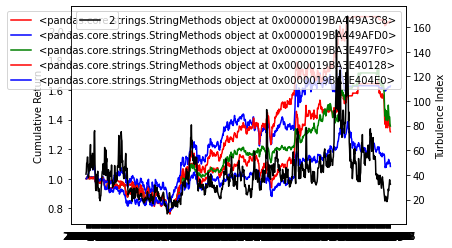

In [103]:
data = pd.read_csv("turbulence_index.csv")
fig = plt.figure()
ax1 = fig.add_subplot(111)

items = np.array(data.columns)[1:-1]
colors = ['r','b','g','r','b']
x = np.array(data.Date)
serise=pd.date_range('20190418', '20190618',freq='1D')
for i in range(len(items)):
    y = np.array(data.iloc[:,i+1])
    ax1.plot(x, y,colors[i],label=pd.DataFrame(data.iloc[:,1]).columns.str);
ax1.legend(loc=1)
ax1.set_ylabel('Cumulative Return');
ax2 = ax1.twinx() # this is the important function
y = np.array(data.turbulence)
ax2.plot(x, y, 'k',label = "2")
ax2.legend(loc=2)
#ax2.set_xlim([0, np.e]);
ax2.set_ylabel('Turbulence Index');
#ax2.set_xlabel('Same X for both exp(-x) and ln(x)');
plt.show()

In [107]:
data.iloc[:,i+1]

0           NaN
1      1.001557
2      1.003695
3      1.008122
4      1.013418
         ...   
877    1.121649
878    1.109114
879    1.106268
880    1.107913
881    1.082904
Name: SSE 50 Index, Length: 882, dtype: float64

In [105]:
pd.DataFrame(data.iloc[:,1])

,ppo_strategy
0,NaN
1,0.999984
2,0.999993
3,1.000040
4,1.000102
...,...
877,1.360272
878,1.368363
879,1.366425
880,1.323479


In [ ]:
turbulence_index

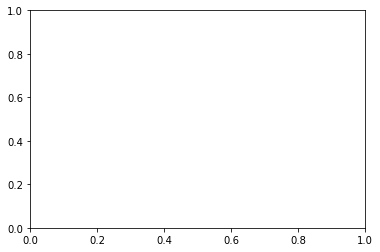

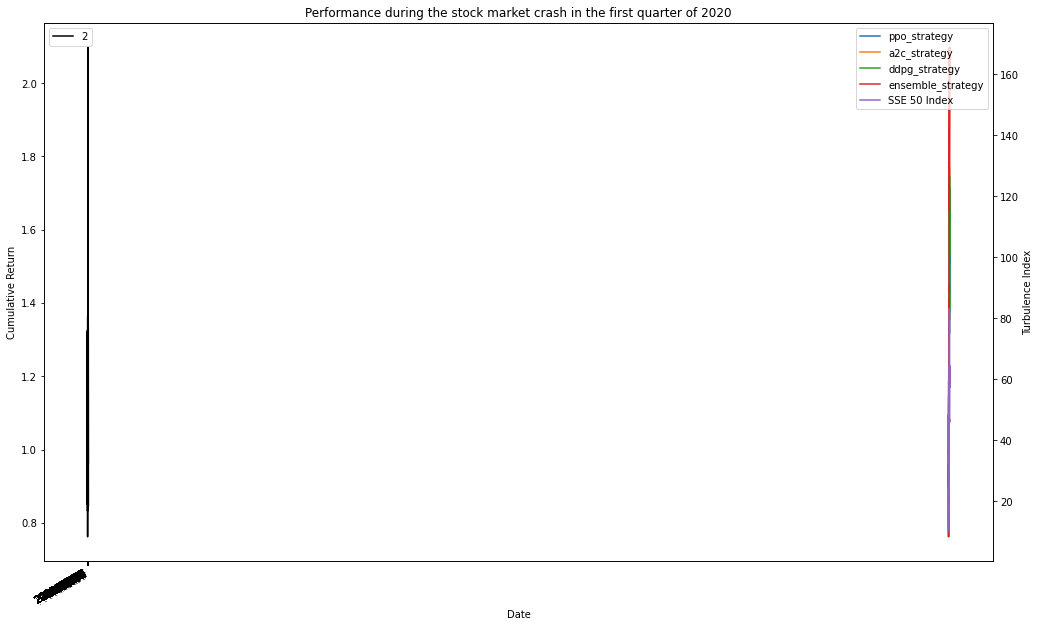

In [102]:
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("turbulence_index.csv")
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = cumulative_returns.plot(figsize=(17,11),
                             title="Performance during the stock market crash in the first quarter of 2020",
)
ax1.legend(loc=1)
ax1.set_ylabel('Cumulative Return');
ax2 = ax1.twinx() # this is the important function
y = np.array(data.turbulence)
ax2.plot(x, y, 'k',label = "2")
ax2.legend(loc=2)
#ax2.set_xlim([0, np.e]);
ax2.set_ylabel('Turbulence Index');
#ax2.set_xlabel('Same X for both exp(-x) and ln(x)');
plt.show()

Start date,2018-01-02
End date,2021-08-17
Total months,42
,Backtest
Annual return,2.302%
Cumulative returns,8.29%
Annual volatility,21.155%
Sharpe ratio,0.21
Calmar ratio,0.08
Stability,0.62
Max drawdown,-28.873%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.87,2018-02-05,2019-01-02,2020-07-06,631
1,22.39,2021-02-10,2021-07-27,NaT,NaN
2,8.24,2020-07-09,2020-07-24,2020-11-23,98
3,4.94,2021-01-12,2021-01-29,2021-02-09,21
4,3.55,2020-12-01,2020-12-11,2020-12-30,22


C:\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020-master\venv\lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


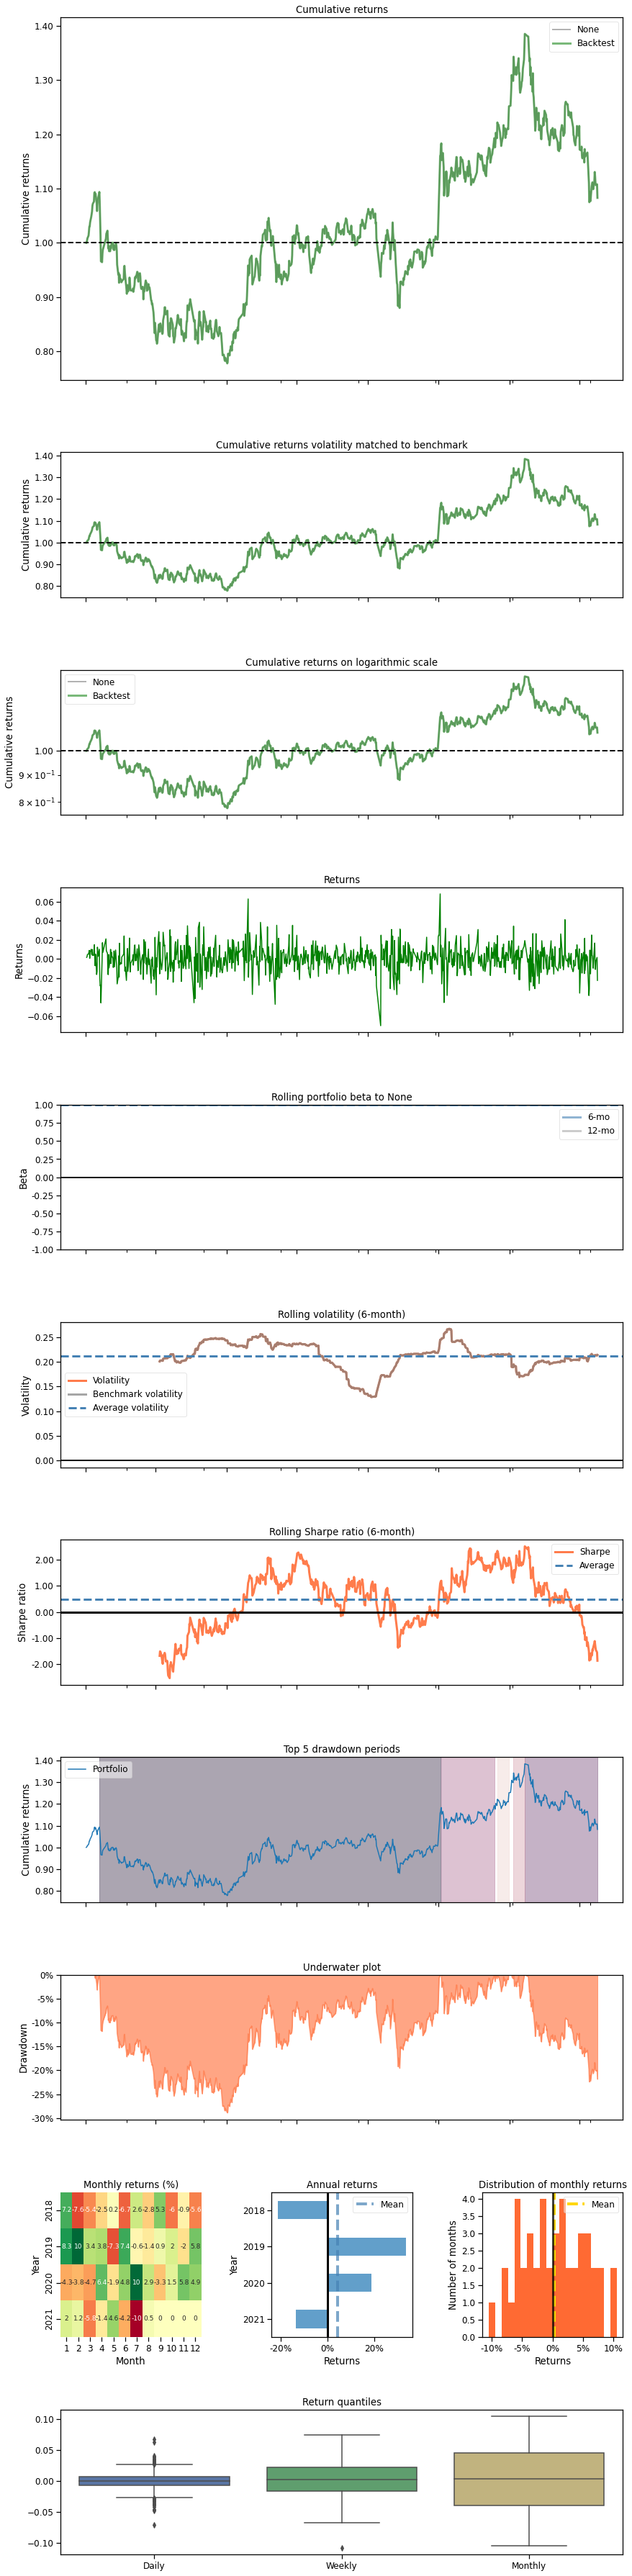

In [108]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
 pyfolio.create_full_tear_sheet(returns = dow_strat,
                                   benchmark_rets=dow_strat, set_context=False)